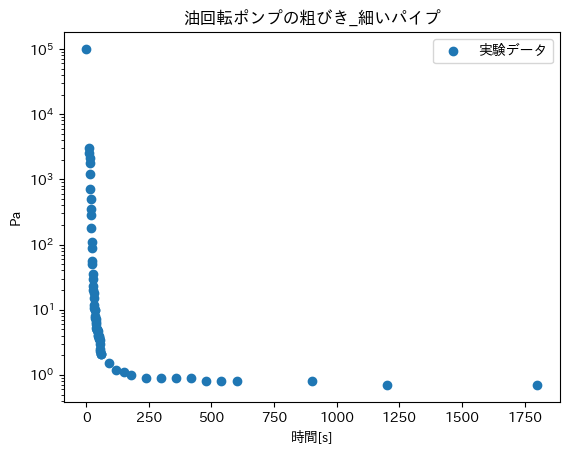

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from scipy.optimize import curve_fit
data_df = pd.read_csv('油回転ポンプ実験b/油回転ポンプの粗びき.csv')


# データプロット
fig,ax = plt.subplots()

ax.scatter(data_df['second'],data_df['Pa'],label='実験データ')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
ax.set_yscale('log')
plt.title("油回転ポンプの粗びき_細いパイプ")
plt.show()

a: 0.0013440860205981373
b: 1.0467741945789504
4.475249402867182e-06


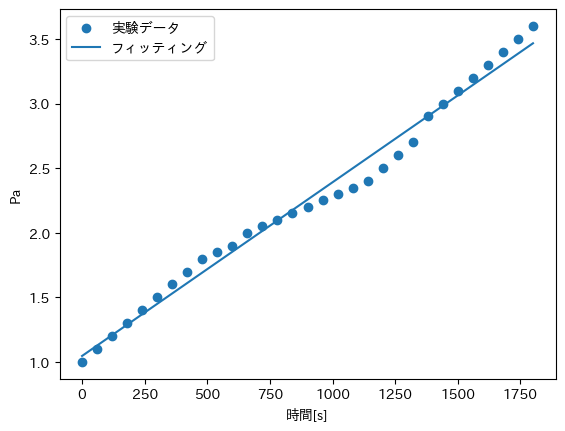

In [3]:
data_df_1 = pd.read_csv('油回転ポンプ実験b/油回転ポンプのQ.csv')

from scipy.optimize import curve_fit

# フィッティング関数
def func(x,a,b):
    return a*x+b

# フィッティングの実行
popt,pcov = curve_fit(func,data_df_1['second'],data_df_1['Pa'])

# フィッティング結果
print('a:',popt[0])
print('b:',popt[1])
A_D = 4.8 * 10**(-2)
L = 0.46 # [m]

V = A_D**2 * L * np.pi 

print(V * popt[0])

# データプロット
fig,ax = plt.subplots()

ax.scatter(data_df_1['second'][:],data_df_1['Pa'][:],label='実験データ')
ax.plot(data_df_1['second'],func(data_df_1['second'],*popt),label='フィッティング')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
# ax.set_yscale('log')
plt.show()

0 0.004126806743443012
100 2.6004099709098227e-05
200 9.887157830235083e-06
300 3.7375959891505772e-06
400 1.4456371673077228e-06
500 4.218281333123741e-07
600 1.4680524884624901e-07
700 1.2323469888997352e-07
800 1.1068672023384352e-07
900 1.0163709163180101e-07
1000 9.464669403769221e-08
1100 8.891835534541315e-08
1200 8.394241746145781e-08
1300 7.944710489482532e-08
1400 7.528496581699073e-08
1500 7.139549040857673e-08
1600 6.774879324211724e-08
1700 6.433603516597941e-08
1800 6.115443795806641e-08
1900 5.818819559522126e-08


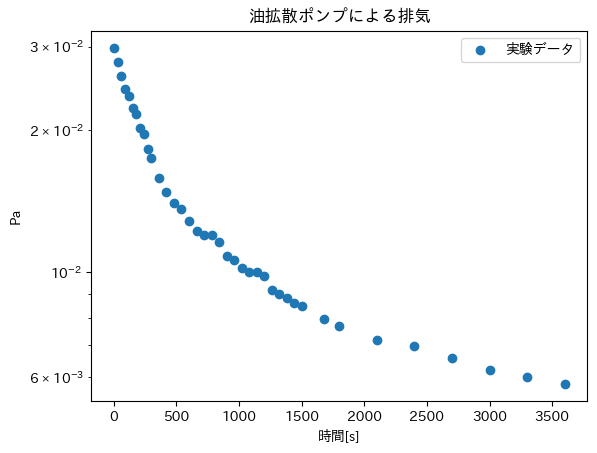

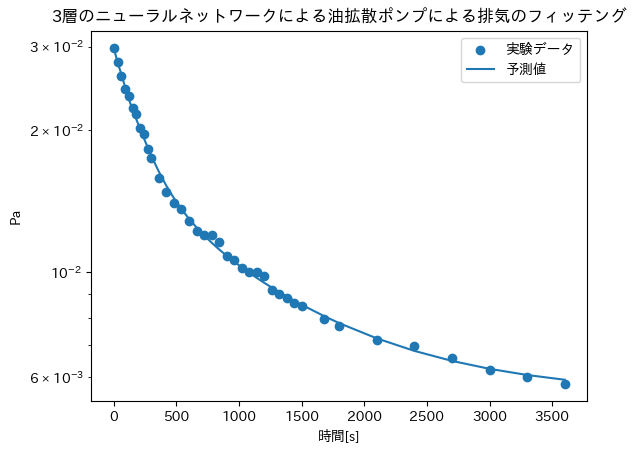

In [12]:
data_df_c = pd.read_csv('油拡散ポンプ実験c/拡散ポンプによる排気.csv')


# データプロット
fig,ax = plt.subplots()
ax.scatter(data_df_c['second'],data_df_c['Pa'],label='実験データ')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
ax.set_yscale('log')
plt.title("油拡散ポンプによる排気")

import torch
import torch.nn as nn


# データの前処理
X = data_df_c['second'].values
y = data_df_c['Pa'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

X = torch.tensor(X,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)

# モデルの定義
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(1,100)
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x   
    
model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

# 学習
for epoch in range(2000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(epoch,loss.item())
    
# データプロット
fig,ax = plt.subplots()
ax.scatter(data_df_c['second'],data_df_c['Pa'],label='実験データ')
ax.plot(X,model(X).detach().numpy(),label='予測値')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
ax.set_yscale('log')
plt.title("3層のニューラルネットワークによる油拡散ポンプによる排気のフィッテング")
plt.show()




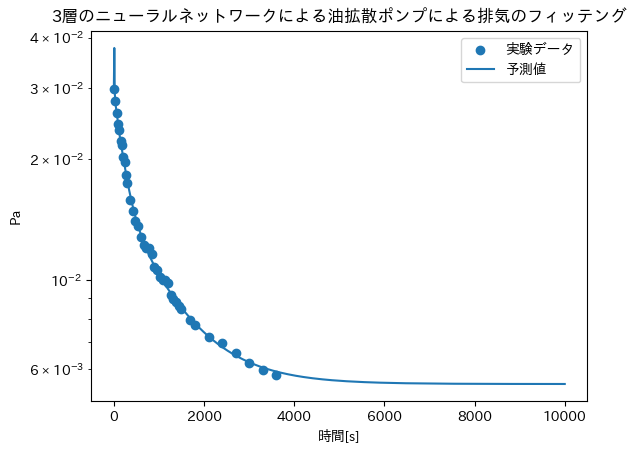

In [19]:
# データプロット
fig,ax = plt.subplots()
ax.scatter(data_df_c['second'],data_df_c['Pa'],label='実験データ')

X_pred = torch.linspace(0,10000,1000).reshape(-1,1)

ax.plot(X_pred.detach().numpy(),model(X_pred).detach().numpy(),label='予測値')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
ax.set_yscale('log')
plt.title("3層のニューラルネットワークによる油拡散ポンプによる排気のフィッテング")
plt.show()


Text(0.5, 1.0, 'トラップによる排気')

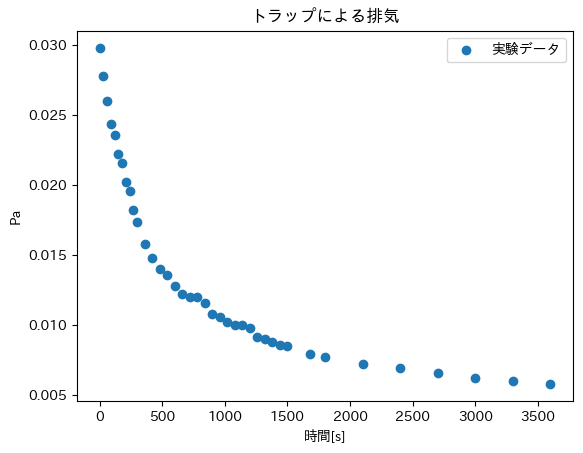

In [ ]:
data_df_trap = pd.read_csv('油拡散ポンプ実験c/トラップによる排気.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_c['second'],data_df_c['Pa'],label='実験データ')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
# ax.set_yscale('log')
plt.title("トラップによる排気")

Text(0.5, 1.0, '拡散ポンプ下でのQ')

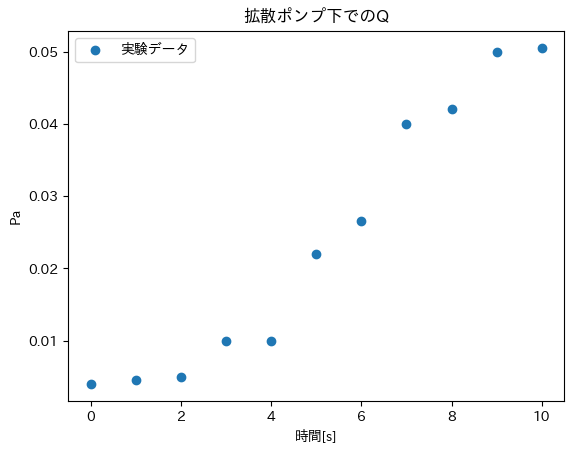

In [10]:
data_df_Q = pd.read_csv('油拡散ポンプ実験c/拡散ポンプ下でのQ.csv')
fig,ax = plt.subplots()
ax.scatter(data_df_Q['min'],data_df_Q['Pa'],label='実験データ')
ax.set_xlabel('時間[s]')
ax.set_ylabel('Pa')
ax.legend()
# ax.set_yscale('log')
plt.title("拡散ポンプ下でのQ")


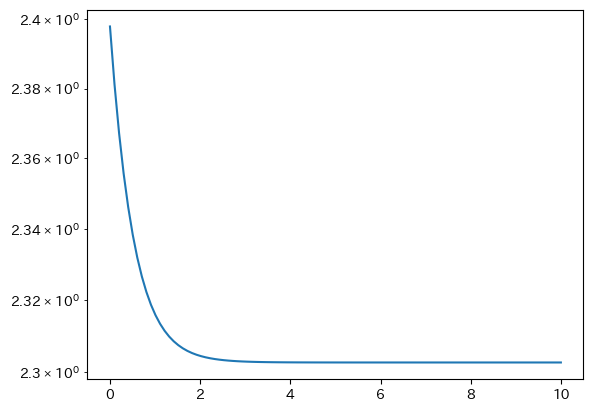

In [10]:
import numpy as np
import matplotlib.pyplot as plt
a = 10
b = 2
x = np.linspace(0, 10, 100)
y = np.log(a + np.exp(-b* x))

plt.plot(x, y)
plt.yscale('log')
